In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import scipy.stats as stats

from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
#from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, mutual_info_regression
#from sklearn import linear_model, datasets, metrics, preprocessing, pipeline
from sklearn.linear_model import LinearRegression, Lasso


In [208]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [209]:
df.drop('yr_renovated', axis=1, inplace=True)
df.drop('view', axis=1, inplace=True)
df.drop('id', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('lat', axis=1, inplace=True)
df.drop('long', axis=1, inplace=True)
df.drop('zipcode', axis=1, inplace=True)


In [210]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1180,0.0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,1800,7503


In [211]:
null_counts = df.isna().sum()
null_counts

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [212]:
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [213]:
df['waterfront'].fillna(value=0, inplace=True)

In [214]:
 df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [215]:
df.waterfront.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

In [216]:
df['sqft_basement'].value_counts().head()

0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64

In [217]:
num_basement = df['sqft_basement'][df['sqft_basement'] != '?']
num_basement = num_basement.astype('float')

In [218]:
num_basement_median = num_basement.median()

In [219]:
df['sqft_basement'].replace({"?": num_basement_median}, inplace=True )

In [220]:
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [221]:
df.sqft_basement[5:10]

5    1530.0
6       0.0
7       0.0
8     730.0
9       0.0
Name: sqft_basement, dtype: float64

Null values in waterfront have been changed to 0, given that the fact that values are either 1 for a waterfront view or 0 for no view, intuitively it makes sense for the null values to be given a value of 0 

"?" was the value given for a number of cells in the squarefoot basement column, this is most like the result of the given house not having a basement, therefor these cells were given a value of 0 as well. 

Drop the row containing 33 bedrooms

In [223]:
df.drop(df.index[15856], inplace = True);

In [224]:
df[df.bedrooms > 9]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
8748,520000.0,11,3.00,3000,4960,2.0,0.0,3,7,2400,600.0,1918,1420,4960
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,3,9,2500,2090.0,2008,2730,10400
15147,650000.0,10,2.00,3610,11914,2.0,0.0,4,7,3010,600.0,1958,2040,11914
19239,660000.0,10,3.00,2920,3745,2.0,0.0,4,7,1860,1060.0,1913,1810,3745


In [284]:
df.loc[7245]

price            7700000.0
bedrooms               6.0
bathrooms              8.0
sqft_living        12050.0
sqft_lot           27600.0
floors                 2.5
waterfront             0.0
condition              4.0
grade                 13.0
sqft_above          8570.0
sqft_basement       3480.0
yr_built            1910.0
sqft_living15       3940.0
sqft_lot15          8800.0
Name: 7245, dtype: float64

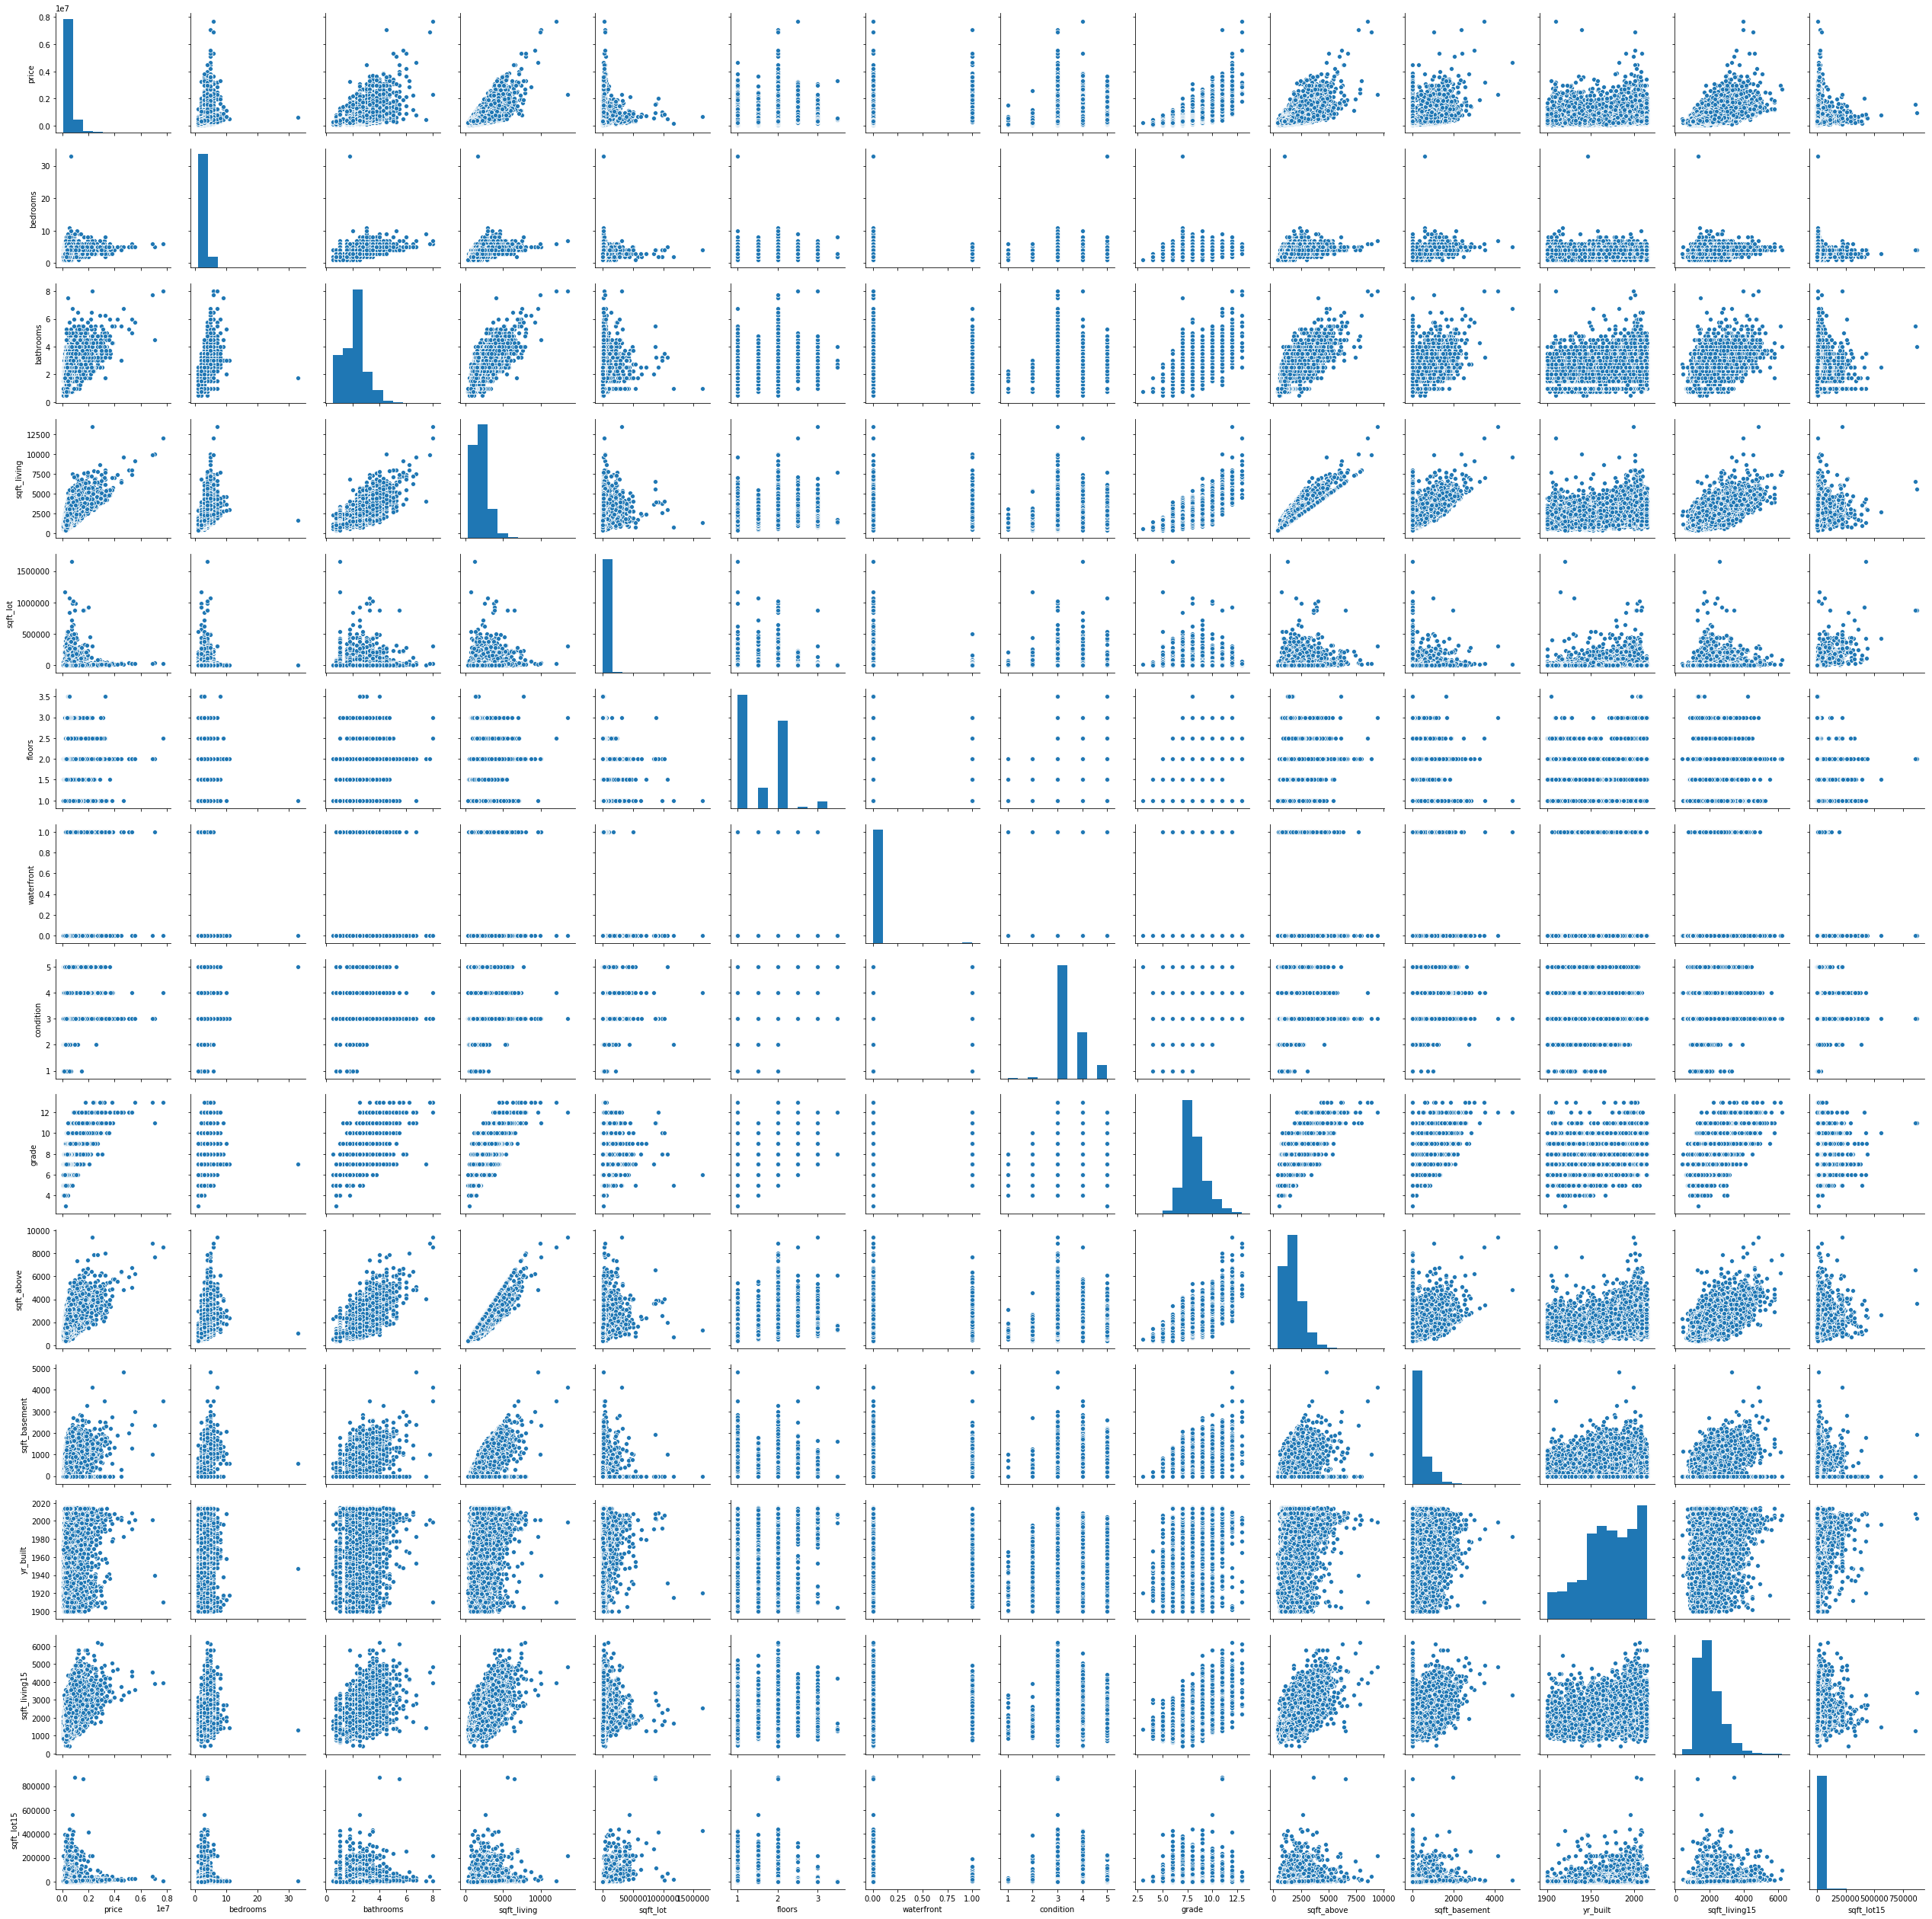

In [198]:
#sns.set(style="darkgrid")`
sns.pairplot(df);

In [225]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,1800,7503


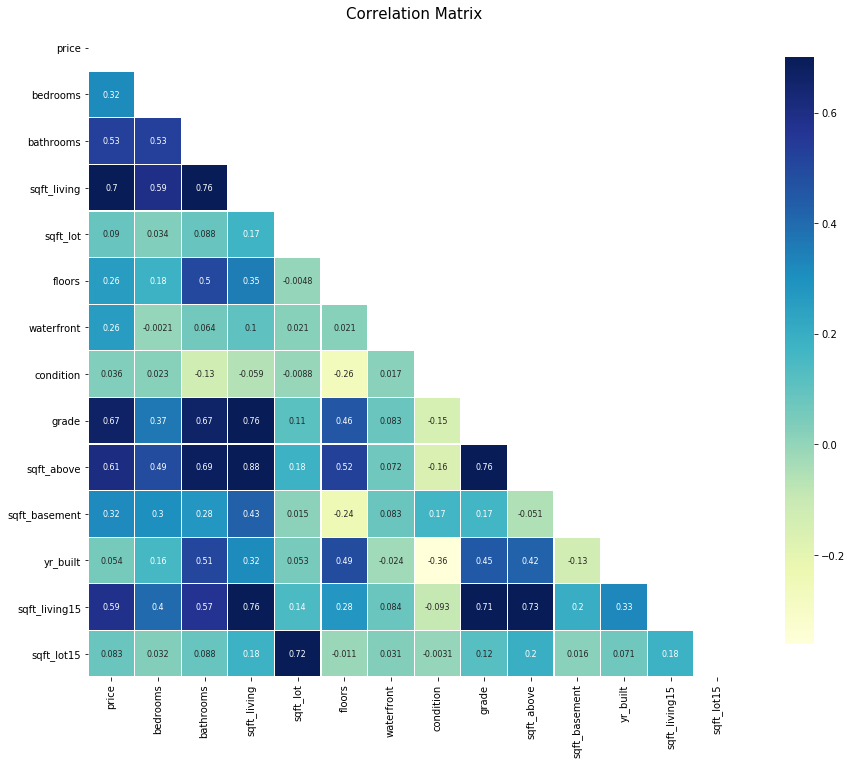

In [226]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'condition',
         'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15']

mask = np.zeros_like(df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation Matrix', fontsize=15)
sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="YlGnBu", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});





In [227]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
price,1.000000,0.315961,0.525915,0.701929,0.089879,0.256820,0.264308,0.036031,0.667964,0.605392,0.321103,0.053965,0.585267,0.082849
bedrooms,0.315961,1.000000,0.527870,0.593178,0.033602,0.183707,-0.002054,0.023440,0.366174,0.492543,0.303517,0.160736,0.404532,0.031892
bathrooms,0.525915,0.527870,1.000000,0.755755,0.088368,0.502574,0.063628,-0.126443,0.665834,0.686664,0.278504,0.507166,0.569878,0.088297
sqft_living,0.701929,0.593178,0.755755,1.000000,0.173449,0.353941,0.104635,-0.059397,0.762776,0.876448,0.428683,0.318140,0.756400,0.184337
sqft_lot,0.089879,0.033602,0.088368,0.173449,1.000000,-0.004824,0.021458,-0.008806,0.114726,0.184134,0.015038,0.052939,0.144756,0.718203
floors,0.256820,0.183707,0.502574,0.353941,-0.004824,1.000000,0.020794,-0.264013,0.458783,0.523970,-0.241845,0.489175,0.280072,-0.010734
waterfront,0.264308,-0.002054,0.063628,0.104635,0.021458,0.020794,1.000000,0.016659,0.082817,0.071776,0.083053,-0.024491,0.083822,0.030657
condition,0.036031,0.023440,-0.126443,-0.059397,-0.008806,-0.264013,0.016659,1.000000,-0.146854,-0.158826,0.168431,-0.361555,-0.092979,-0.003093
grade,0.667964,0.366174,0.665834,0.762776,0.114726,0.458783,0.082817,-0.146854,1.000000,0.756069,0.165863,0.447854,0.713863,0.120974
sqft_above,0.605392,0.492543,0.686664,0.876448,0.184134,0.523970,0.071776,-0.158826,0.756069,1.000000,-0.051149,0.424017,0.731756,0.195069


In [228]:
#conditon_dummies = pd.get_dummies(df["condition"], prefix="cond")
#grade_dummies = pd.get_dummies(df["grade"], prefix="grad")
#bed_dummies =  pd.get_dummies(df["bedrooms"], prefix="bed")


#data = pd.concat([price, conditon_dummies, grade_dummies], axis=1)
#data.iloc[:5,:15]

#df['grade'].plot.hist(figsize=(6,6));
#df.plot.scatter(x='condition', y='price');

In [229]:
#df['sqft_living'] = np.log(df["sqft_living"])
#for i in df:
#    ax = sns.distplot(df[i])
#   plt.show()

In [230]:
#fig = plt.figure(figsize=(15, 12))
#fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
#plt.show()

#sns.pairplot(data=df, x_vars=["bedrooms", 'bathrooms',  "sqft_living", "floors", "grade", "condition"], y_vars=["price"], kind="reg")


## Dealing With Categorical Data

In [231]:
df[df.bedrooms >= 10]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
8748,520000.0,11,3.00,3000,4960,2.0,0.0,3,7,2400,600.0,1918,1420,4960
13301,1150000.0,10,5.25,4590,10920,1.0,0.0,3,9,2500,2090.0,2008,2730,10400
15147,650000.0,10,2.00,3610,11914,2.0,0.0,4,7,3010,600.0,1958,2040,11914
19239,660000.0,10,3.00,2920,3745,2.0,0.0,4,7,1860,1060.0,1913,1810,3745


/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


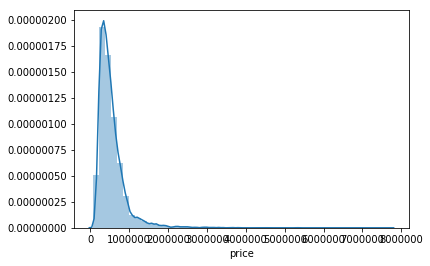

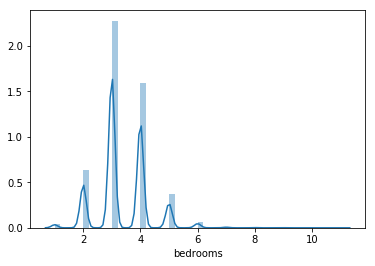

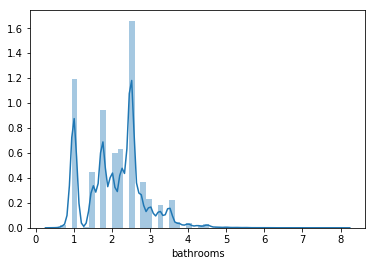

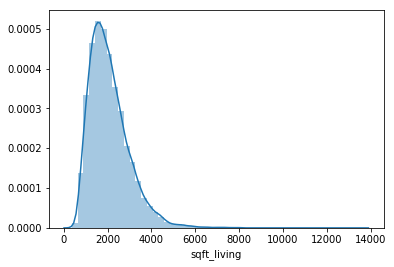

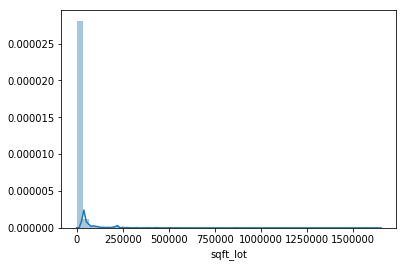

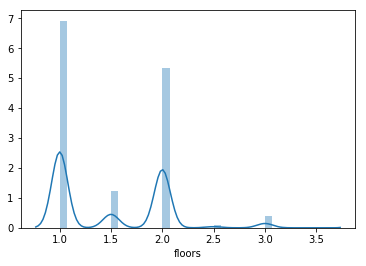

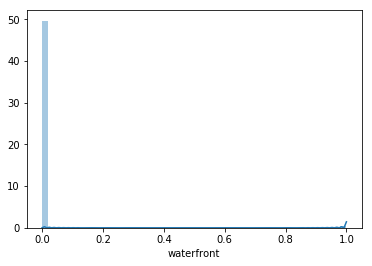

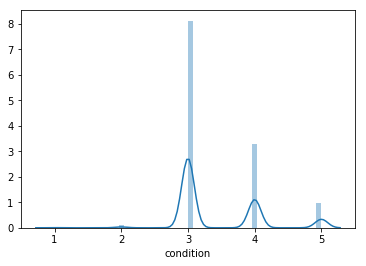

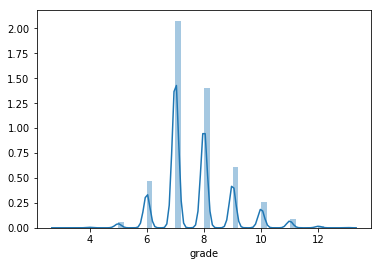

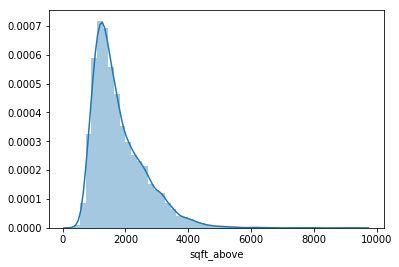

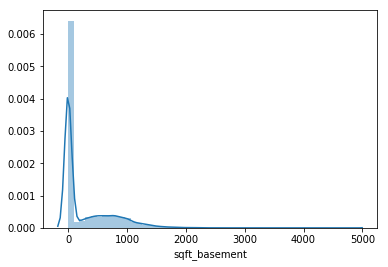

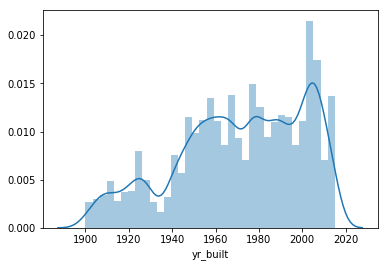

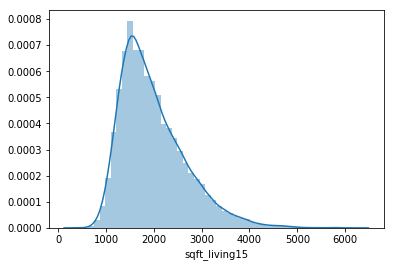

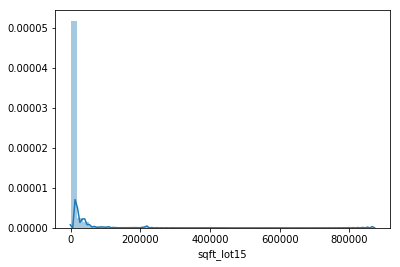

In [232]:
for i in df:
    sns.distplot(df[i])
    plt.show()

In [233]:
#bin yrs built into decade 
len(df.yr_built.unique())

116

In [268]:
bins = [1900, 1920, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2005, 2010, 2015]
bins_year_built = pd.cut(df['yr_built'], bins)
bins_year_built = bins_year_built.cat.as_unordered()
year_built = pd.get_dummies(bins_year_built, prefix="yr", drop_first=True) #dropped years built 1900-1920
year_built.head()

,"yr_(1920, 1940]","yr_(1940, 1950]","yr_(1950, 1960]","yr_(1960, 1970]","yr_(1970, 1980]","yr_(1980, 1990]","yr_(1990, 2000]","yr_(2000, 2005]","yr_(2005, 2010]","yr_(2010, 2015]"
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0


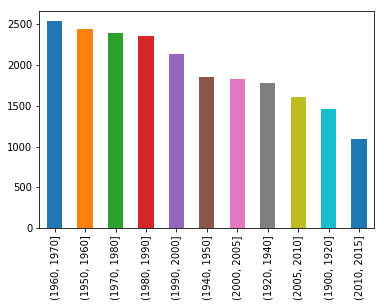

In [253]:
bins_year_built.value_counts().plot(kind='bar');

/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


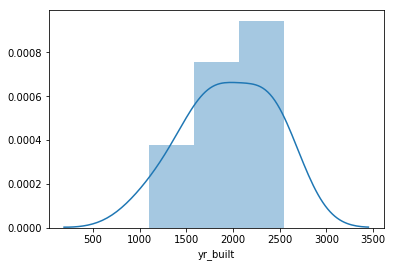

In [254]:
sns.distplot(bins_year_built.value_counts())

In [256]:
from sklearn import preprocessing
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder

In [257]:
#disc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

#bedrooms_bin = disc.fit_transform(X)
#bedrooms_bin

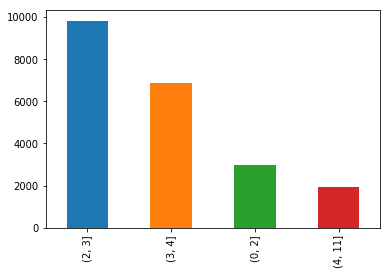

In [258]:
bins2 = [0,2,3,4,11]
bins_bedrooms = pd.cut(df['bedrooms'], bins2)
bins_bedrooms = bins_bedrooms.cat.as_unordered()
bedrooms = pd.get_dummies(bins_bedrooms, prefix="bd", drop_first=True) #dropped 0 to 2 bedrooms
bins_bedrooms.value_counts().plot(kind='bar');

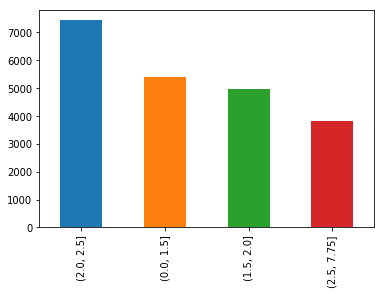

In [259]:
bins3 = [0,1.5,2, 2.5,7.75]
bins_bathrooms = pd.cut(df['bathrooms'], bins3)
bins_bathrooms = bins_bathrooms.cat.as_unordered()
bathrooms = pd.get_dummies(bins_bathrooms, prefix="bth", drop_first=True) #dropped 0 to 1.5 bathrooms
bins_bathrooms.value_counts().plot(kind='bar');

In [260]:
#pd.set_option("display.max_rows", 21597)
pd.set_option('display.max_columns', 500)
#pd.set_option(‘display.width’, 1000)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,1800,7503


In [261]:
condition = pd.get_dummies(df['condition'], prefix="con", drop_first=True)


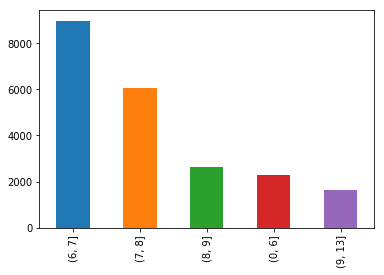

In [269]:
bins4 = [0,6,7,8,9,13]
bins_grade = pd.cut(df['grade'], bins4)
bins_grade = bins_grade.cat.as_unordered()
grade = pd.get_dummies(bins_grade, prefix="gr", drop_first=True) #dropped grade = 0 to 6
bins_grade.value_counts().plot(kind='bar');

In [270]:
y = df.iloc[:, :1]

In [276]:
X = df.iloc[:, 2:]
X = df.drop(['yr_built', 'price', 'bedrooms', 'bathrooms', 'grade', 'condition', 'sqft_lot', 'sqft_above'], axis=1)
X = pd.concat([X, year_built, bedrooms, bathrooms, grade, condition], axis=1 )

In [277]:

X.head()

,sqft_living,floors,waterfront,sqft_basement,sqft_living15,sqft_lot15,"yr_(1920, 1940]","yr_(1940, 1950]","yr_(1950, 1960]","yr_(1960, 1970]","yr_(1970, 1980]","yr_(1980, 1990]","yr_(1990, 2000]","yr_(2000, 2005]","yr_(2005, 2010]","yr_(2010, 2015]","bd_(2, 3]","bd_(3, 4]","bd_(4, 11]","bth_(1.5, 2.0]","bth_(2.0, 2.5]","bth_(2.5, 7.75]","gr_(6, 7]","gr_(7, 8]","gr_(8, 9]","gr_(9, 13]",con_2,con_3,con_4,con_5
0,1180,1.0,0.0,0.0,1340,5650,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2570,2.0,0.0,400.0,1690,7639,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
2,770,1.0,0.0,0.0,2720,8062,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1960,1.0,0.0,910.0,1360,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,1680,1.0,0.0,0.0,1800,7503,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

X_train_orig = X_train 
X_test_orig = X_test
y_train_orig = y_train
y_test_orig = y_test

print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape) 

(17276, 30)
(4320, 30)
(17276, 1)
(4320, 1)


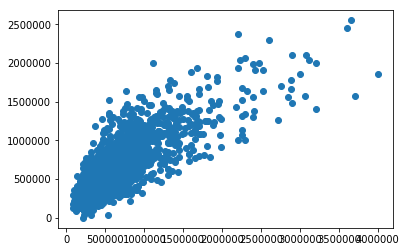

In [279]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions);


In [280]:
X.head()

,sqft_living,floors,waterfront,sqft_basement,sqft_living15,sqft_lot15,"yr_(1920, 1940]","yr_(1940, 1950]","yr_(1950, 1960]","yr_(1960, 1970]","yr_(1970, 1980]","yr_(1980, 1990]","yr_(1990, 2000]","yr_(2000, 2005]","yr_(2005, 2010]","yr_(2010, 2015]","bd_(2, 3]","bd_(3, 4]","bd_(4, 11]","bth_(1.5, 2.0]","bth_(2.0, 2.5]","bth_(2.5, 7.75]","gr_(6, 7]","gr_(7, 8]","gr_(8, 9]","gr_(9, 13]",con_2,con_3,con_4,con_5
0,1180,1.0,0.0,0.0,1340,5650,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,2570,2.0,0.0,400.0,1690,7639,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
2,770,1.0,0.0,0.0,2720,8062,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1960,1.0,0.0,910.0,1360,5000,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1
4,1680,1.0,0.0,0.0,1800,7503,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


## Regression

In [281]:
reg = LinearRegression()

reg.fit(X_train, y_train)
X_int = sm.add_constant(X)

model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     1329.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        11:53:31   Log-Likelihood:            -2.9607e+05
No. Observations:               21596   AIC:                         5.922e+05
Df Residuals:                   21565   BIC:                         5.925e+05
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -8389.3070   4.15e+04     -0.202      0.840   -8.97e+04    7.29e+04
sqft_living       177.4011      3.824     46.388      0.000     169.905     184.897
floors           4.797e+04   4399.760     10.904      0.000    3.94e+04    5.66e+04
waterfront       7.374e+05   1.83e+04     40.197      0.000    7.01e+05    7.73e+05
sqft_basement      35.6733      4.613      7.734      0.000      26.632      44.714
sqft_living15      49.9817      3.662     13.648      0.000      42.804      57.160
sqft_lot15         -0.5097      0.057     -8.958      0.000      -0.621      -0.398
yr_(1920, 1940] -1.827e+04   7595.188     -2.406      0.016   -3.32e+04   -3383.501
yr_(1940, 1950] -6.636e+04   7618.040     -8.711      0.000   -8.13e+04   -5.14e+04
yr_(1950, 1960] -1.134e+05   7364.314    -15.396      0.000   -1.28e+05   -9.89e+04
yr_(1960, 1970] -1.688e+05   7435.292    -22.699      0.000   -1.83e+05   -1.54e+05
yr_(1970, 1980] -2.112e+05   7603.988    -27.780      0.000   -2.26e+05   -1.96e+05
yr_(1980, 1990] -2.489e+05   7821.099    -31.826      0.000   -2.64e+05   -2.34e+05
yr_(1990, 2000] -2.759e+05   8277.794    -33.333      0.000   -2.92e+05    -2.6e+05
yr_(2000, 2005] -2.596e+05   8559.805    -30.325      0.000   -2.76e+05   -2.43e+05
yr_(2005, 2010] -2.258e+05   8796.080    -25.667      0.000   -2.43e+05   -2.09e+05
yr_(2010, 2015] -2.409e+05   9603.136    -25.085      0.000    -2.6e+05   -2.22e+05
bd_(2, 3]        -4.28e+04   5172.961     -8.273      0.000   -5.29e+04   -3.27e+04
bd_(3, 4]       -1.015e+05   6021.560    -16.861      0.000   -1.13e+05   -8.97e+04
bd_(4, 11]      -1.036e+05   8037.633    -12.884      0.000   -1.19e+05   -8.78e+04
bth_(1.5, 2.0]  -1845.0597   4895.697     -0.377      0.706   -1.14e+04    7750.870
bth_(2.0, 2.5]  -2.477e+04   5914.346     -4.188      0.000   -3.64e+04   -1.32e+04
bth_(2.5, 7.75]  2.446e+04   7210.830      3.393      0.001    1.03e+04    3.86e+04
gr_(6, 7]        9.478e+04   5755.963     16.467      0.000    8.35e+04    1.06e+05
gr_(7, 8]        1.729e+05   6895.618     25.075      0.000    1.59e+05    1.86e+05
gr_(8, 9]        2.811e+05   8609.085     32.652      0.000    2.64e+05    2.98e+05
gr_(9, 13]       5.411e+05   1.09e+04     49.604      0.000     5.2e+05    5.63e+05
con_2            2.815e+04   4.38e+04      0.642      0.521   -5.78e+04    1.14e+05
con_3            6.083e+04   4.07e+04      1.495      0.135   -1.89e+04    1.41e+05
con_4            8.498e+04   4.07e+04      2.087      0.037    5180.362    1.65e+05
con_5            1.212e+05    4.1e+04      2.959      0.003    4.09e+04    2.01e+05
==============================================================================
Omnibus:                    16712.945   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          14

In [64]:
f = 'grade ~ sqft_living+sqft_living15'
model2 = smf.ols(formula=f, data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                 1.804e+04
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        08:10:04   Log-Likelihood:                -23484.
No. Observations:               21597   AIC:                         4.697e+04
Df Residuals:                   21594   BIC:                         4.700e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.1853      0.015    345.895      0.000       5.156       5.215
sqft_living       0.0007   8.13e-06     81.809      0.000       0.001       0.001
sqft_living15     0.0005   1.09e-05     50.266      0.000       0.001       0.001
==============================================================================
Omnibus:                      350.910   Durbin-Watson:                   1.915
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.217
Skew:                           0.104   Prob(JB):                    7.03e-139
Kurtosis:                       3.815   Cond. No.                     9.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
#fig = plt.figure(figsize=(10, 8))
#fig = sm.graphics.plot_regress_exog(model, 'sqft_living', fig=fig)
#plt.show()

In [66]:
f = 'price ~ floors+sqft_living+yr_built+sqft_lot'
model = smf.ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     6186.
Date:                Mon, 06 May 2019   Prob (F-statistic):               0.00
Time:                        08:10:07   Log-Likelihood:            -2.9914e+05
No. Observations:               21597   AIC:                         5.983e+05
Df Residuals:                   21592   BIC:                         5.983e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.58e+06    1.3e+05     42.769      0.000    5.32e+06    5.84e+06
floors        7.37e+04   3746.199     19.673      0.000    6.64e+04     8.1e+04
sqft_living   297.1063      2.053    144.725      0.000     293.082     301.130
yr_built    -2924.7377     67.722    -43.187      0.000   -3057.478   -2791.997
sqft_lot       -0.2307      0.042     -5.497      0.000      -0.313      -0.148
==============================================================================
Omnibus:                    14783.326   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           577548.654
Skew:                           2.792   Prob(JB):                         0.00
Kurtosis:                      27.711   Cond. No.                     3.37e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""